## 1. Objetivo do Projeto

    Este notebook tem como objetivo construir modelos preditivos para identificar clientes com maior propensão ao cancelamento de serviços (churn). A antecipação desse comportamento permitirá estratégias mais eficazes de retenção.

## 2. Entendimento e Pré-processamento dos Dados

    Nesta etapa, analisamos a estrutura do dataset, verificamos valores ausentes e realizamos uma análise estatística descritiva inicial.

## 2.1 Verificando a Estrutura Geral do Dataset

In [1]:
# Importando bibliotecas necessárias
import pandas as pd

# Carregando o dataset
df = pd.read_csv('TelecomX_Churn-master.csv')
# Exibindo as primeiras linhas do dataset
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1.0,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1.0,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


## 2.2 Informações Básicas Sobre o Dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   float64
 1   customer.gender                                7267 non-null   int64  
 2   customer.SeniorCitizen                         7267 non-null   int64  
 3   customer.Partner                               7267 non-null   int64  
 4   customer.Dependents                            7267 non-null   int64  
 5   customer.tenure                                7267 non-null   int64  
 6   phone.PhoneService                             7267 non-null   int64  
 7   account.PaperlessBilling                       7267 non-null   int64  
 8   account.Charges.Monthly                        7267 non-null   float64
 9   account.Charges.Total                          7267 

Isso nos mostra o número de colunas, tipos de dados e se há colunas com valores ausentes.

## 2.3 Verificando Valores Ausentes

In [3]:
# Contagem de valores ausentes
df.isnull().sum()

Churn                                            224
customer.gender                                    0
customer.SeniorCitizen                             0
customer.Partner                                   0
customer.Dependents                                0
customer.tenure                                    0
phone.PhoneService                                 0
account.PaperlessBilling                           0
account.Charges.Monthly                            0
account.Charges.Total                              0
phone.MultipleLines_No phone service               0
phone.MultipleLines_Yes                            0
internet.InternetService_Fiber optic               0
internet.InternetService_No                        0
internet.OnlineSecurity_No internet service        0
internet.OnlineSecurity_Yes                        0
internet.OnlineBackup_No internet service          0
internet.OnlineBackup_Yes                          0
internet.DeviceProtection_No internet service 

Aqui identificamos que a variável Churn possui 224 valores nulos, o que precisa ser tratado, já que é a variável-alvo da modelagem.

## 2.4 Estatísticas Descritivas das Colunas Numéricas

In [4]:
# Estatísticas para variáveis numéricas
df.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2279.287581
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2267.178963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


Esta análise ajuda a identificar valores extremos, distribuições e faixas de variáveis importantes como tenure, Charges.Monthly e Charges.Total.

## 2.5 Visualização da Distribuição da Variável-Alvo Churn

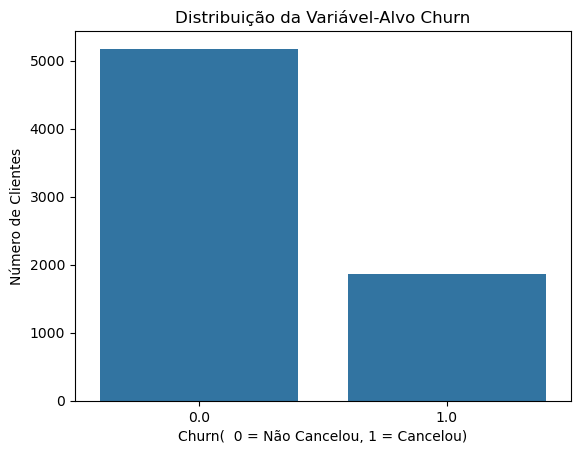

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de contagem de valores para a variável-alvo 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Distribuição da Variável-Alvo Churn')
plt.xlabel('Churn(  0 = Não Cancelou, 1 = Cancelou)')
plt.ylabel('Número de Clientes')
plt.show()